## Imports

In [1]:
import os
import re
import pprint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import xmltodict
import numpy as np
import scipy.io
from PIL import Image

import requests
import shutil

from initial import dataset_from_raw, preprocessing as init_processing

from config import Config
import utils



## Raw Dataset

In [2]:
# !wget https://filebox.ece.vt.edu/~vrama91/CIDEr_miscellanous/cider_datasets.tarB
# !tar -xvf cider_datasets.tar

## Parsing dataset

In [3]:
# dataset_from_raw.dataset_from_raw()
# init_processing.annots_preprocessing()


jenny is batting and mike is throwing in a game of baseball.
mike and jenny are playing baseball together while their cat watches them.
mike and jenny are going to a baseball game.
mike and jenny are playing baseball together.
jenny just hit a home run in baseball.  her and mike jump up excitedly.
jenny is holding a baseball bat while mike is smiling with a glove and hat on.
the two kids are playing baseball.
mike and jenny play a game of baseball.
mike and jenny are playing baseball next to a cat.
happy jenny holds the baseball hat while happy mike holds up his hands.
mike and jenny are playing baseball, with jenny batting and mike pitching.
jenny and mike won the game and it is time to celebrate!
jill is running with a baseball bat towards jack with a catchers glove.
mike and jenny are playing baseball while the cat watches from a distance.
mike and jenny are playing baseball.
mike and jenny are playing baseball outside.
jenny and mike are happily playing baseball.
jenny and mike ar

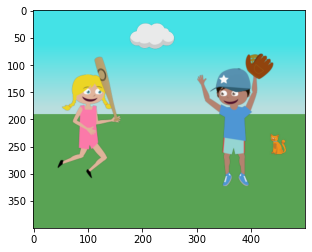

In [4]:
utils.show_example(Config.abstract50s, 0)

# Caption processing

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from preprocessing import preprocess_caption, get_wordnet_pos, lemmatize_caption

In [6]:
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

In [17]:
for i in range(1):
    annots = utils.get_annots(Config.abstract50s, i)
    captions = annots.split('\n')

    for c in captions:
        caption = preprocess_caption(c)
        lem_caption = lemmatize_caption(caption, lemmatizer, stemmer)
        print(lem_caption)



throw mike jenni bat basebal game
play mike jenni basebal cat watch togeth
go mike jenni basebal game
play mike jenni basebal togeth
jump mike home jenni hit run basebal excit
smile glove mike hold jenni bat hat basebal
play two kid basebal
play mike jenni basebal game
next play mike jenni basebal cat
mike happi hand hold jenni hat basebal
play mike jenni bat pitch basebal
mike jenni celebr game time
catcher toward glove jack bat run basebal jill
play mike distanc jenni basebal cat watch
play jenni mike basebal
play mike outsid jenni basebal
play mike jenni basebal happili
play jenni mike basebal
play mike jenni basebal park
rememb mike happi bring jenni bat see basebal
play mike jenni basebal mitt
play mike jenni basebal enjoy togeth
play mike happi outsid jenni basebal
play jenni mike basebal
play eachoth mike jenni basebal happili
fun play mike jenni basebal
play mike jenni run basebal
play mike jenni basebal togeth
mike hold jenni bat basebal mit
catch mike jenni bat basebal game
